In [ ]:
from google.colab import drive

drive.mount('/content/drive')


KeyboardInterrupt: ignored

In [ ]:
ROOT_DIR = r'/content/drive/MyDrive/dataset_calories'

In [ ]:
cd /content/drive/MyDrive/dataset_calories

In [ ]:
!pip install ultralytics

In [ ]:
import os

from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "google_colab_config.yaml"), epochs=50)  # train the model

In [ ]:
!pwd /content/drive/MyDrive/dataset_calories/google_colab_config.yaml


/content/drive/.shortcut-targets-by-id/1RJ4xxgTAuqCqD2SVkehoN0ZtlaDm-l57/Image Segmentation/ECUSTFD-resized--master


In [ ]:
cd /content/drive/MyDrive/dataset_calories/runs/detect/train/weights

/content/drive/MyDrive/dataset_calories/runs/detect/train/weights


In [ ]:
!pwd


/content/drive/MyDrive/dataset_calories/runs/detect/train/weights


In [ ]:
import os

from ultralytics import YOLO

model = YOLO('best.pt')

In [ ]:
cd /content/

/content


In [ ]:
image_path = "/content/mix008T(3).jpg"
results = model.predict(image_path)
# !yolo take=detect mode=predict model=path/to/best.pt conf=0.25 source= path/to/folder


image 1/1 /content/mix008T(3).jpg: 480x640 1 coin, 1 banana, 1 tomato, 9.8ms
Speed: 3.0ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
result = results[0]
print(len(result.boxes))
box = result.boxes[0]
print(box)

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


3
ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[355.9153, 334.9247, 532.1085, 511.4465,   0.9418,  14.0000]], device='cuda:0')
cls: tensor([14.], device='cuda:0')
conf: tensor([0.9418], device='cuda:0')
data: tensor([[355.9153, 334.9247, 532.1085, 511.4465,   0.9418,  14.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (612, 816)
shape: torch.Size([1, 6])
xywh: tensor([[444.0119, 423.1856, 176.1931, 176.5218]], device='cuda:0')
xywhn: tensor([[0.5441, 0.6915, 0.2159, 0.2884]], device='cuda:0')
xyxy: tensor([[355.9153, 334.9247, 532.1085, 511.4465]], device='cuda:0')
xyxyn: tensor([[0.4362, 0.5473, 0.6521, 0.8357]], device='cuda:0')


In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: tomato
Coordinates: [356, 335, 532, 511]
Probability: 0.94
---
Object type: banana
Coordinates: [208, 91, 618, 294]
Probability: 0.93
---
Object type: coin
Coordinates: [111, 198, 171, 257]
Probability: 0.91
---


In [ ]:
print(result.names)


{0: 'apple', 1: 'coin', 2: 'banana', 3: 'bread', 4: 'bun', 5: 'doughnut', 6: 'egg', 7: 'fired_dough_twist', 8: 'grape', 9: 'lemon', 10: 'litchi', 11: 'mango', 12: 'orange', 13: 'qiwi', 14: 'tomato', 15: 'pear', 16: 'mooncake', 17: 'peach', 18: 'plum', 19: 'sachima'}


In [ ]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [ ]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name,prob, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = int(bbox[0]), int(bbox[1]), int(bbox[2] ),int(bbox[3])

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name + str(prob),
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name,prob):

    img = image.copy()

    for bbox, category_id,prob in zip(bboxes, category_ids,prob):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name,prob)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    img1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img1)

In [ ]:
from numpy.lib.function_base import append

bboxes = []
category_ids = []
prob = []

for box in result.boxes:
    bboxes.append(box.xyxy[0].tolist())
    category_ids.append(box.cls[0].item())
    prob.append(round(box.conf[0].item(), 2))

image = cv2.imread(image_path)

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
calories = { 'apple': 52, 'coin':0, 'banana': 89, 'bread':315, 'bun':223,
        'doughnut':434, 'egg':143, 'fired_dough_twist':2416,
        'grape':69, 'lemon':29, 'litchi':66, 'mango':60,
        'mooncake':1883, 'orange':63, 'peach':57, 'pear':39,
        'plum':46, 'qiwi':61, 'sachima':2145, 'tomato':27 }
category_id_to_name = {0: 'apple 52cal/100grams', 1: 'coin 0cal', 2: 'banana 89cal/100grams', 3: 'bread 315cal/100grams',
                       4: 'bun 2.23cal/100grams', 5: 'doughnut 4.34cal/100grams', 6: 'egg 1.43cal/100grams',
                       7: 'fired_dough_twist 2416cal/100grams', 8: 'grape 69cal/100grams', 9: 'lemon 29cal/100grams',
                       10: 'litchi 66cal/100grams', 11: 'mango 60cal/100grams', 12: 'orange 63cal/100grams',
                       13: 'qiwi 61cal/100grams', 14: 'tomato 27cal/100grams', 15: 'pear 39cal/100grams',
                       16: 'mooncake 1883cal/100grams', 17: 'peach 57cal/100grams', 18: 'plum 46cal/100grams', 19: 'sachima 2145cal/100grams'}

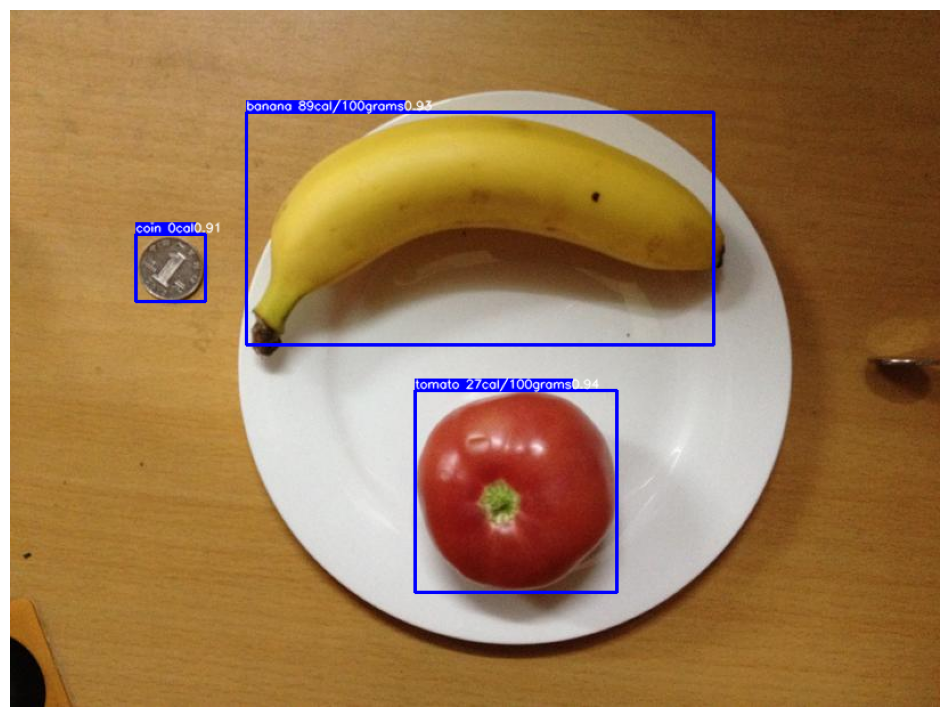

In [ ]:
visualize(image, bboxes, category_ids, category_id_to_name,prob)

In [ ]:
total_calories = 0

for box in result.boxes:
  class_id = result.names[box.cls[0].item()]

  total_calories = total_calories + calories[class_id]

print(total_calories)

116


In [ ]:
!pip install -q streamlit


In [ ]:
%%writefile app.py
import streamlit as st
st.title("Food calories estimation")
img_file = st.file_uploader("Choose an Image", type=["jpg", "png"])
if img_file is not None:
        img = Image.open(img_file).resize((250, 250))
        st.image(img, use_column_width=False)
        save_image_path = './upload_images/' + img_file.name
        with open(save_image_path, "wb") as f:
            f.write(img_file.getbuffer())

Overwriting app.py


In [ ]:
!npm install localtunnel


npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.287s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run app.py &>/content/logs.txt &


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.957s
